初始点为:
[1 1] 

[2 8]
[[2 0]
 [0 8]]
第1次迭代结果:
[0. 0.] 



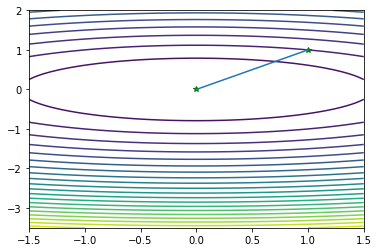

In [2]:
"""
Newton法
Rosenbrock函数
函数 f(x)
梯度 g(x)
hessen 矩阵
"""

import numpy as np
import matplotlib.pyplot as plt

# 一阶导
def jacobian(x):
    return np.array([2*x[0],8*x[1]])

# 二阶导
def hessian(x):
    return np.array([[2,0],[0,8]])

X1=np.arange(-1.5,1.5+0.05,0.05)
X2=np.arange(-3.5,2+0.05,0.05)
[x1,x2]=np.meshgrid(X1,X2)
f=x1 ** 2 + 4 * x2 ** 2; # 给定的函数
plt.contour(x1,x2,f,20) # 画出函数的20条轮廓线


def newton(x0):

    print('初始点为:')
    print(x0,'\n')
    W=np.zeros((2,10**3))
    i = 1
    imax = 1000
    W[:,0] = x0 
    x = x0
    delta = 1

    while i<imax and delta>0.000001:
        p = -np.dot(np.linalg.inv(hessian(x)),jacobian(x))
        print(jacobian(x))
        print(hessian(x))
        x0 = x
        x = x + p
        W[:,i] = x
        delta = sum((x-x0))
        print('第'+str(i)+'次迭代结果:')
        print(x,'\n')
        i=i+1
    W=W[:,0:i]  # 记录迭代点
    return W

x0 = np.array([1,1])
W=newton(x0)

plt.plot(W[0,:],W[1,:],'g*',W[0,:],W[1,:]) # 画出迭代点收敛的轨迹
plt.show()
